# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

# Read the data

In [10]:
df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [12]:
df = df.drop(columns=df.columns[2:5])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.columns = ['Category', 'Message']
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [16]:
df.nunique()

Category       2
Message     5169
dtype: int64

# EDA

In [17]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [18]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


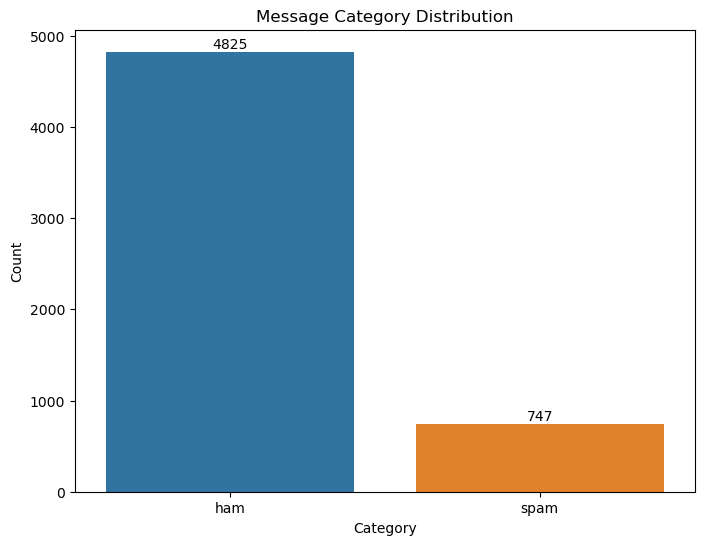

In [34]:
# Count the number of messages in each category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Message Category Distribution')

# Add text with counts on the bars
for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [35]:
df['spam']= df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


## # Split data into training and testing sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam, train_size=.8)

In [37]:
y_train

5317    0
4793    0
2246    1
4611    0
3166    0
       ..
271     0
5007    0
1300    0
5138    0
1497    0
Name: spam, Length: 4457, dtype: int64

In [38]:
X_train

5317    K, fyi I'm back in my parents' place in south ...
4793          Sorry that was my uncle. I.ll keep in touch
2246    Hi ya babe x u 4goten bout me?' scammers getti...
4611    Sorry da. I gone mad so many pending works wha...
3166    When people see my msgs, They think Iam addict...
                              ...                        
271     Night has ended for another day, morning has c...
5007                         Go fool dont cheat others ok
1300    Those cocksuckers. If it makes you feel better...
5138    Yup... I havent been there before... You want ...
1497    I'm putting it on now. It should be ready for ...
Name: Message, Length: 4457, dtype: object

# Create a CountVectorizer for text feature extraction

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
featurizer = CountVectorizer()
X_train_count = featurizer.fit_transform(X_train.values)

In [40]:
X_train_count

<4457x7654 sparse matrix of type '<class 'numpy.int64'>'
	with 58692 stored elements in Compressed Sparse Row format>

## Create the Multinomial Naive Bayes model

In [41]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [42]:
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = featurizer.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [44]:
X_test_count = featurizer.transform(X_test)
model.score(X_test_count, y_test)

0.9883408071748879

## Create the Sklearn Pipeline model

In [45]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [46]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [47]:
clf.score(X_test,y_test)

0.9883408071748879

In [48]:
clf.predict(emails)

array([0, 1], dtype=int64)